<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Documentacion Procesamiento de imagenes

# Introduccion al Procesamiento de Imagenes Orientado a Redes Profundas
#### Lucas Bautista


# Que es una imagen?

Se puede pensar a una imagen como un arreglo de 3 matrices, comúnmente denominado **tensor**,en donde cada una de estas se identifican con tres canales, en particular azul(b), rojo(r) y verde(g), en dichos elementos de cada matriz, se almacena el grado de intensidad lumínica que registra cada sensor óptico de cada uno de los canales, la composición de estos resultados y la adecuada codificación, generan las fotografías que observamos habitualmente,[mayor informacion capitulo 1 de este libro](http://the-eye.eu/public/Books/IT%20Various/Image%20Processing%2C%202nd%20Edition.pdf).

# Canales de una imagen

Es común pensar que cuando hablamos del canal rojo o azul de una imagen, si solo extraemos dicho elemento la imagen resultante se verá con un filtro de ese mismo canal, pues esto no es así ya que, como mencionamos anteriormente, los canales son valores de intensidad lumínica expresados de 0 a 255, para que exista color, es necesario realizar la composición, por lo que el resultado esperado es tener una imagen en un formato de escala de grises, dependiendo la intensidad del canal que se extrajo.

# Ejemplos con OpenCV 

## Carga de datos
Veamos un ejemplo de cómo cargar una imagen haciendo uso de OpenCV, primero que nada debemos saber en qué formato se carga la imagen, dentro de los formatos pueden diferenciarse según el orden de canal **rgb** o **bgr** que tiene que ver la forma en la que se ordenan las matrices en memoria y **channel last (chl) (fila,columna,canales)** o **channel first (chf) (canales,filas,columnas)** que tiene que ver con la forma en la que se estructuran los datos del tensor. OpenCV levanta las imágenes en formato *bgr chl* sin embargo matoplotlib trabaja con imagenes en formato *rgb chl* por lo que para visualizarlas es necesario invertir los canales del tensor, esta instruccion se realiza de forma optima mediante el operador **[:,:,::-1]** el cual invierte la priemra posicion por la ultima, y mantiene constante la del medio. de este modo *bgr* se convierte en *rgb*, se hace mencion ya que sera utilizado con mucha frecuencia. 

La imagen mide 1540X2080 pixeles y tiene 3 canales



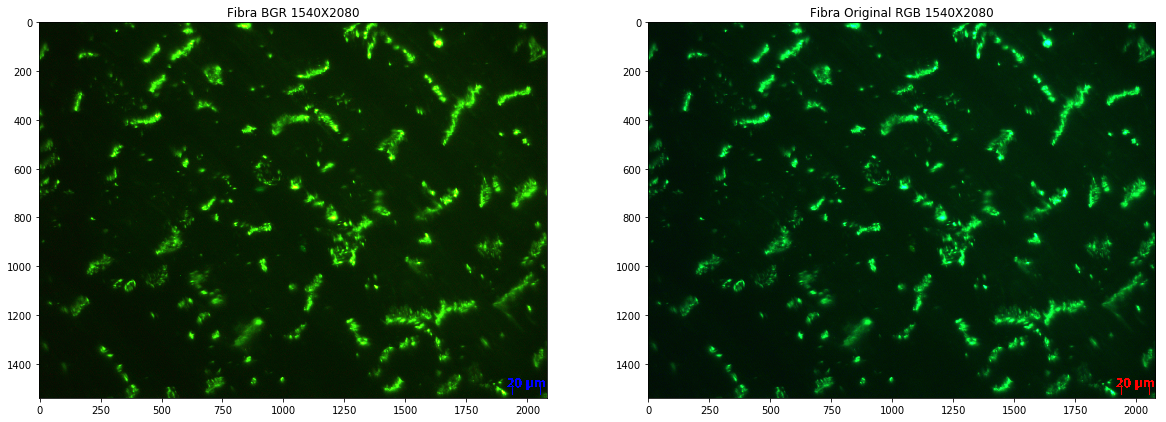

In [256]:
from __future__ import print_function
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

im1 = cv2.imread("i2.tif") #cargamos la imagen
print("La imagen mide %sX%s pixeles y tiene %s canales\n"%(im1.shape))

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(im1),plt.title("Fibra BGR %sX%s"%(im1.shape[0:2]))
plt.subplot(1,2,2)
plt.imshow(im1[:,:,::-1]),plt.title("Fibra Original RGB %sX%s"%(im1.shape[0:2])); #realizamos la operacion inversion


## Extraccion de Canales
Procedemos a extraer y mostrar los canales de la misma, nótese como la imagen en su mayoría es verde, por lo que es esperable que tanto canal rojo como azul se muestran muy apagados y en cambio el canal verde sea muy prendido, es decir se viera como si la imagen se le hubiese quitado el color. El resultado de la extraccion resulta en una imagen la cual ya no es mas un tensor sino que pasa a ser una matriz por ende solo tiene 1 canal.A modo ilustrativo se muestra la forma de realizar la extracción y lo sencilla e intuitiva que resulta si la imagen estuviera en *channel first* puesto que simplemente hay que indexar a una posición,esto es para comprender la motivación de trabajar en este formato, sobre todo cuando se tengan batches de imágenes que son **tensores**.

La imagen mide 1540X2080 pixeles y tiene 3 canales

La imagen mide 1540X2080 pixeles y tiene 1 canal

La imagen mide 1540X2080 pixeles y tiene 1 canal

La imagen mide 1540X2080 pixeles y tiene 1 canal



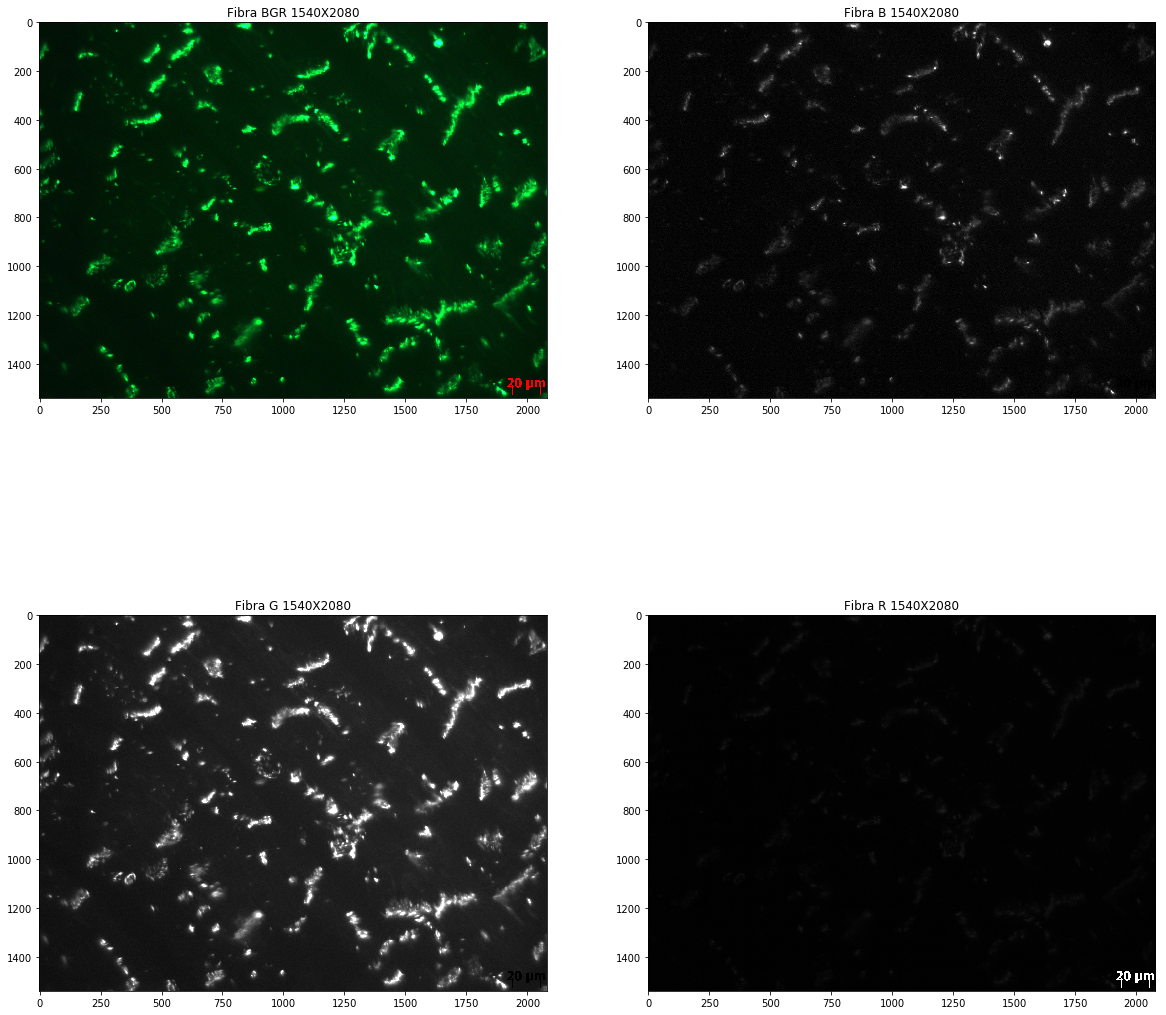

In [257]:
im1_b = im1[:,:,0] #extraccion canal azul
im1_g = im1[:,:,1] #extraccion canal verde
im1_r = im1[:,:,2] #extraccion canal rojo

#extraccion si la imagen estuviera en formato chf
#im1_b = im1[0] #extraccion canal azul
#im1_g = im1[1] #extraccion canal verde
#im1_r = im1[2] #extraccion canal rojo
print("La imagen mide %sX%s pixeles y tiene %s canales\n"%(im1.shape))
print("La imagen mide %sX%s pixeles y tiene 1 canal\n"%(im1_b.shape))
print("La imagen mide %sX%s pixeles y tiene 1 canal\n"%(im1_g.shape))
print("La imagen mide %sX%s pixeles y tiene 1 canal\n"%(im1_r.shape))

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(im1[:,:,::-1],'gray'),plt.title("Fibra BGR %sX%s"%(im1.shape[0:2]))
plt.subplot(2,2,2)
plt.imshow(im1_b,'gray'),plt.title("Fibra B %sX%s"%(im1.shape[0:2]))
plt.subplot(2,2,3)
plt.imshow(im1_g,'gray'),plt.title("Fibra G %sX%s"%(im1.shape[0:2]))
plt.subplot(2,2,4)
plt.imshow(im1_r,'gray'),plt.title("Fibra R %sX%s"%(im1.shape[0:2]));

## Filtrado por Color
Para lograr el efecto de filtrado de canal en la imagen, es decir, obtener una imagen que sea solo roja,verde o azul, dependiendo de qué canal elijamos debemos anular, no extraer, los demas canales que no sean de interés, para ello creamos una copia y ponemos a 0 los valores de los demás canales, la diferencia con la operación anterior es que la imagen filtrada, aún preserva sus canales y es formato *rgb* o *bgr* es decir, sigue siendo un tensor y no una matriz.

La imagen mide 1540X2080 pixeles y tiene 3 canales

La imagen mide 1540X2080 pixeles y tiene 3 canales

La imagen mide 1540X2080 pixeles y tiene 3 canales



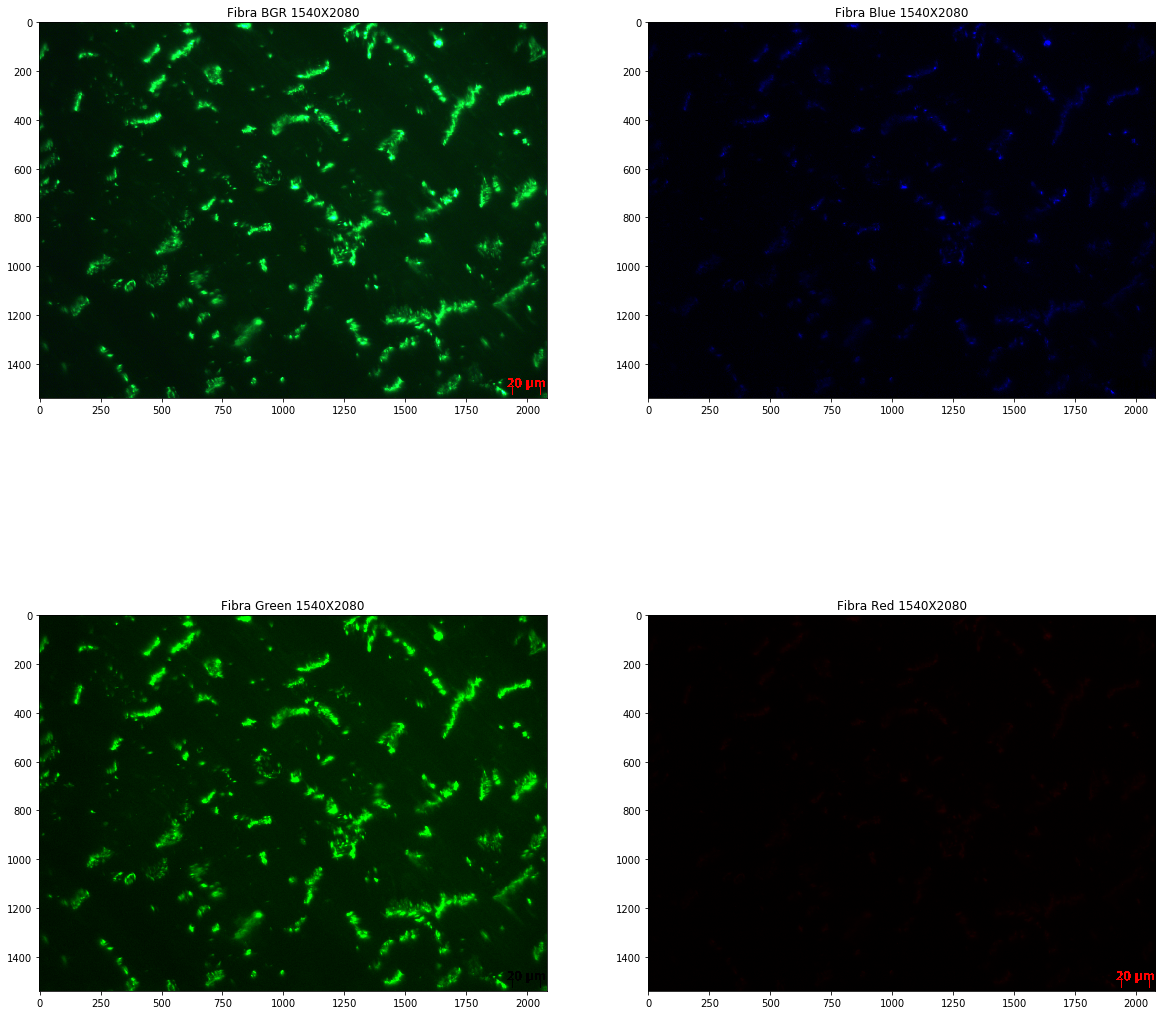

In [258]:
#preservacion de canal rojo
img_red = im1.copy()
img_red[:,:,0]=0#anulo canal azul
img_red[:,:,1]=0#anulo canal verde
print("La imagen mide %sX%s pixeles y tiene %s canales\n"%(img_red.shape))
#preservacion del canal azul
img_blue = im1.copy()
img_blue[:,:,1]=0 #anulo canal verde
img_blue[:,:,2]=0 #anulo canal rojo
print("La imagen mide %sX%s pixeles y tiene %s canales\n"%(img_blue.shape))
#preservacion del canal verde
img_green = im1.copy()
img_green[:,:,0]=0 #anulo canal azul
img_green[:,:,2]=0 #anulo canal rojo
print("La imagen mide %sX%s pixeles y tiene %s canales\n"%(img_green.shape))

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(im1[:,:,::-1]),plt.title("Fibra BGR %sX%s"%(im1.shape[0:2]))
plt.subplot(2,2,2)
plt.imshow(img_blue[:,:,::-1]),plt.title("Fibra Blue %sX%s"%(im1.shape[0:2]))
plt.subplot(2,2,3)
plt.imshow(img_green[:,:,::-1]),plt.title("Fibra Green %sX%s"%(im1.shape[0:2]))
plt.subplot(2,2,4)
plt.imshow(img_red[:,:,::-1]),plt.title("Fibra Red %sX%s"%(im1.shape[0:2]));

# Pre-Procesamiento de Dataset
Dada la forma en la que se estructura el trabajo con redes profundas, es necesario definir un tamaño fijo de entrada a la red, es decir se tendrá un **batch** de x imágenes las cuales cada una de ellas tendrá la misma dimensión. el peor caso posible supone, que en el dataset las imágenes tendrán no solo un tamaño variable sino que además una relación de aspecto muy diferente, por lo que podremos encontrar, imágenes cuadradas y rectangulares tanto más largas que anchas o viceversa. Sin embargo esta no es la única problemática, la memoria es limitada y el dataset suele ser muy amplio por lo que es recomendable trabajar con imagenes chicas (250x250) sobre todo si el dataset será aumentado con técnicas de preprocesamiento como este caso.

Para lidiar con esta problemática se crea un dataset ficticio que presente la mayor generalidad de relaciones de aspectos y a su vez incluya el caso más favorable, una imagen cuadrada. En este dataset se tienen imágenes patrón que luego funcionaran para probar los algoritmos de preprocesamiento, principalmente rotación y extracción de zonas de interés denominadas *roi(region of interest)*,los cuales permitirán aumentar el dataset para mejorar la performance de entrenamiento en la red.

## Tamaño de imagen.

### Resampleo con cv2.resize()
A continuación se muestra un script en el cual se pueden apreciar las consecuencias de forzar un tamaño de imagen, para empezar se pierde calidad en la imagen, dado que es necesario realizar un resampleo de la misma. a su vez las imágenes se distorsionan, puesto que la cifra colocado muy  probablemente no corresponda a la relación de aspecto de la misma, sobre todo si se la fuerza a ser cuadrada. El problema de esta distorsión es que se está alterando  falseando notablemente la información. En una aplicación donde la morfología de la imagen sea crucial, un aprendizaje con este tipo de distorsión puede resultar deficiente. Por lo que este método de resampleo quedaría descartado. 

en el script, el usuario puede modificar los valores de alto y largo de salida, en las imágenes para apreciar los efectos de distorsión. En este caso se opta por un valor convencional para entrenamiento de redes,250X250. notese como las unicas imagenes que no sufren distorsion son las cuadradas, independientemente de su valor. esto se debe a que se esta moficando de forma proporcional el tamaño de la misma sin alterar su relacion de aspecto, razon por la cual es una gran motivacion el utilizar imagenes cuadras a la hora de entrenar estas redes


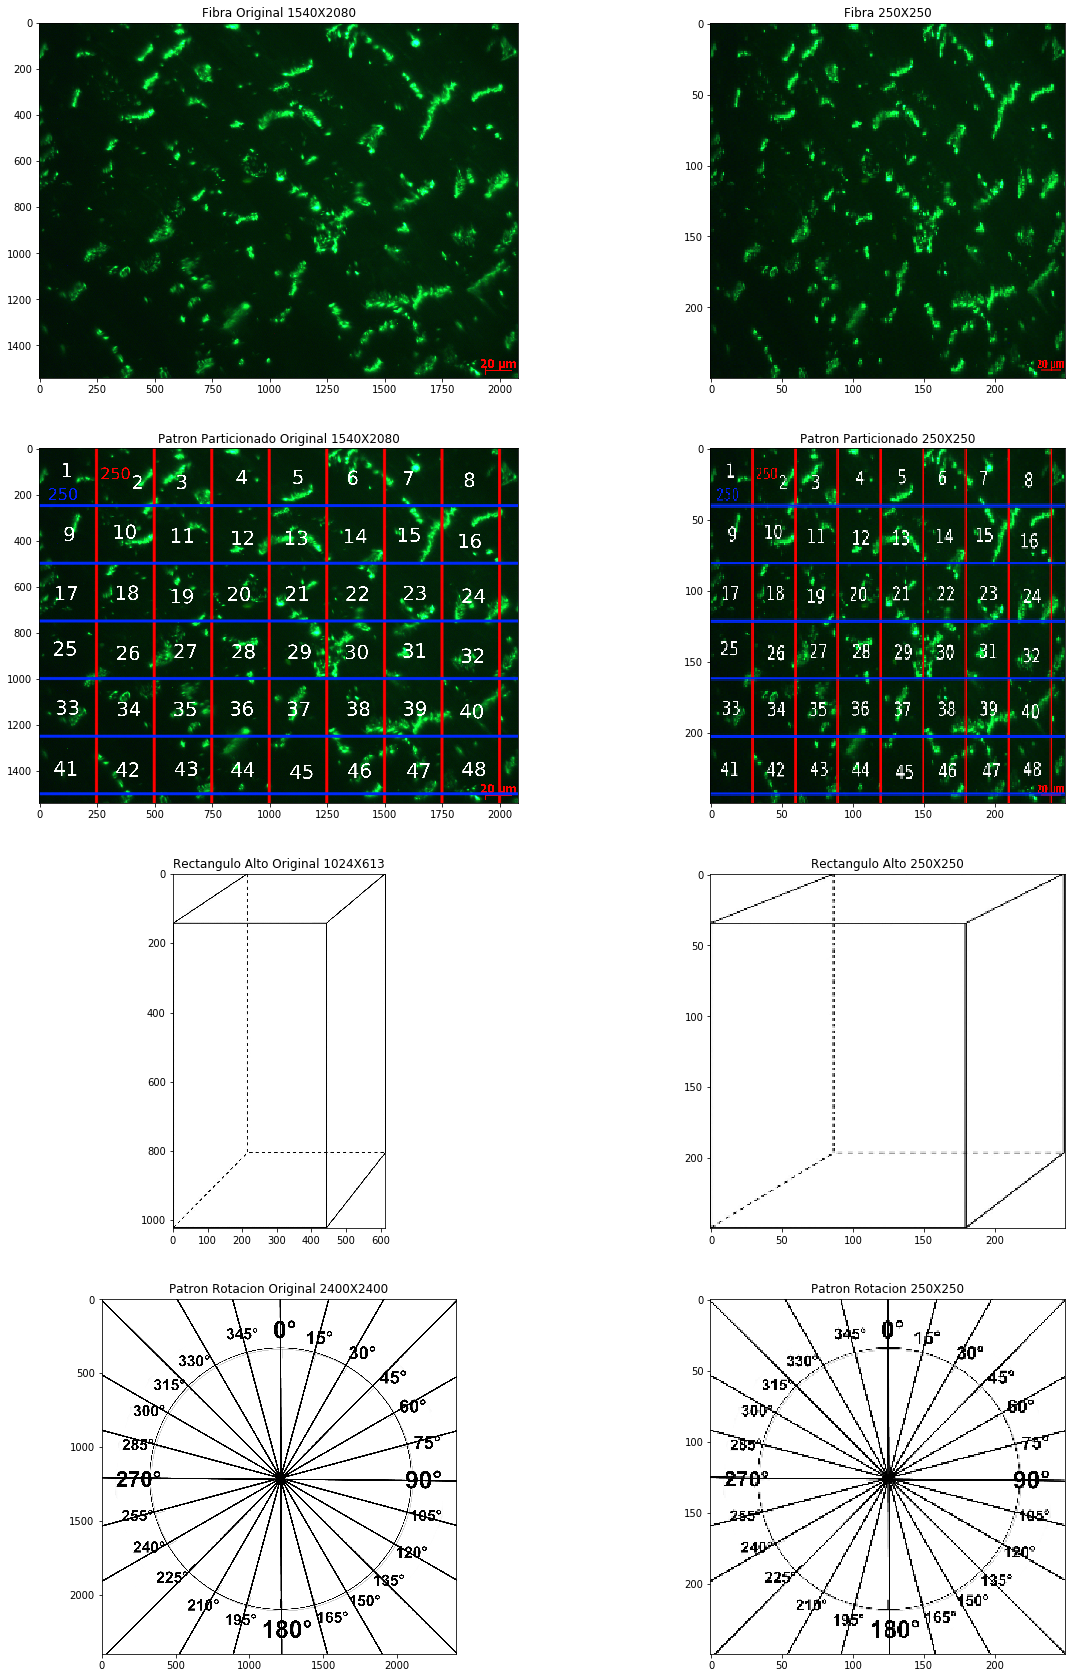

In [259]:
alto = 250
largo = 250

output_shape = (alto,largo)

im1 = cv2.imread("i2.tif")
im2 = cv2.imread("patron_desp.png")
im3 = cv2.imread("hrect.jpg")
im4 = cv2.imread("compass_15.png")

plt.figure(figsize=(20,30))
plt.subplot(4,2,1)
plt.imshow(im1[:,:,::-1]),plt.title("Fibra Original %sX%s"%(im1.shape[0:2]))
plt.subplot(4,2,2)
plt.imshow(cv2.resize(im1[:,:,::-1],output_shape)),plt.title("Fibra %sX%s"%output_shape);
plt.subplot(4,2,3)
plt.imshow(im2[:,:,::-1]),plt.title("Patron Particionado Original %sX%s"%(im2.shape[0:2]))
plt.subplot(4,2,4)
plt.imshow(cv2.resize(im2[:,:,::-1],output_shape)),plt.title("Patron Particionado %sX%s"%output_shape)
plt.subplot(4,2,5)
plt.imshow(im3[:,:,::-1]),plt.title("Rectangulo Alto Original %sX%s"%(im3.shape[0:2]))
plt.subplot(4,2,6)
plt.imshow(cv2.resize(im3[:,:,::-1],output_shape)),plt.title("Rectangulo Alto %sX%s"%output_shape)
plt.subplot(4,2,7)
plt.imshow(im4[:,:,::-1]),plt.title("Patron Rotacion Original %sX%s"%(im4.shape[0:2]));
plt.subplot(4,2,8)
plt.imshow(cv2.resize(im4[:,:,::-1],output_shape)),plt.title("Patron Rotacion %sX%s"%output_shape);


### Grid-crop
Dado la naturaleza del problema y que las imágenes que se van a tratar presentan una característica homogénea, se plantea resolver no solo la problematica de obtencion de **imagenes fijas** sino que ademas parte de la **aumentacion del dataset para mayor generalización**,mediante una técnica de **grid-crop**. Grid crop consiste en establecer una grilla de $nxm$ píxeles, los cuales se distribuyen a lo largo de toda la imagen, luego se definen regiones de interés *roi’s* y se las extrae haciendo uso de un algoritmo compuesto de un doble for, de este modo se muestrea la mayor cantidad de área posible(quedando un remanente). así a partir de una imagen y con este particionado pueden extraerse una cantidad mayor de ejemplos. lógicamente el particionado es conveniente que sea cuadrado y de menor área posible para el funcionamiento de la red, nuevamente se lo toma de 250x250, dado que la imagen patrón que verifica el funcionamiento del algoritmo,posee una grilla hecha y medida a mano de dichas dimensiones,donde cada *roi* es etiquetada y asignada con un numero.

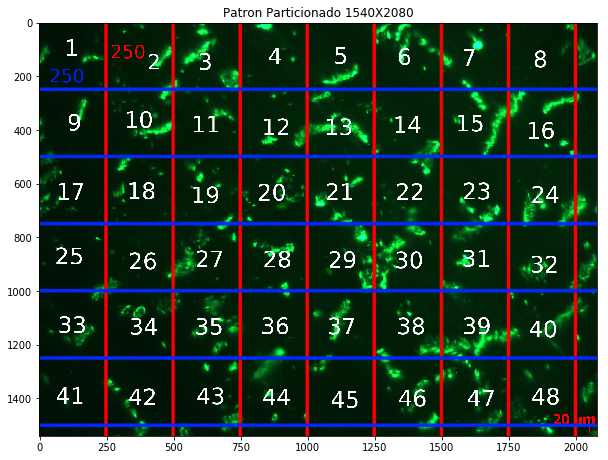

In [260]:
image = cv2.imread("patron_desp.png")
plt.figure(figsize=(10,10))
plt.imshow(image[:,:,::-1]),plt.title("Patron Particionado %sX%s"%(image.shape[0:2]));

Recuerde que las Imagenes se Listan del Numero 1 al 48



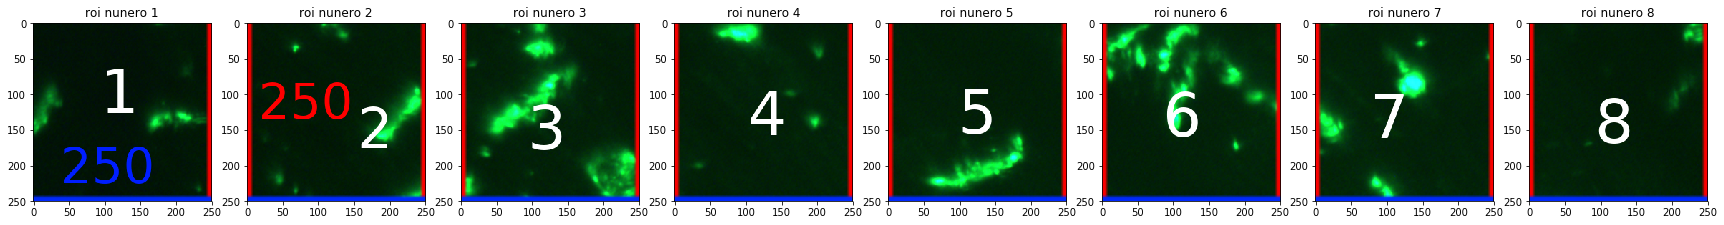

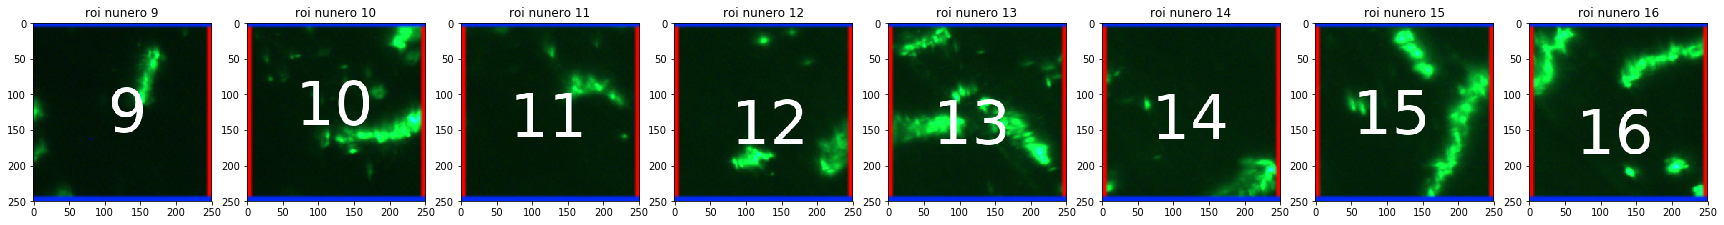

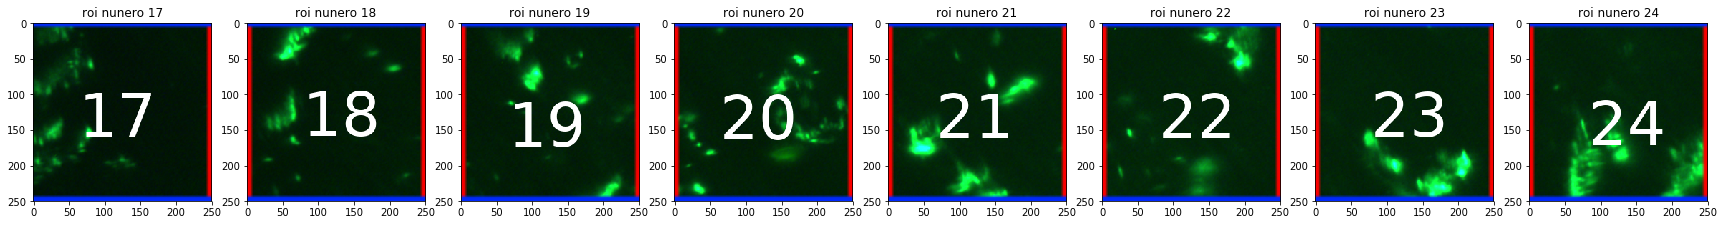

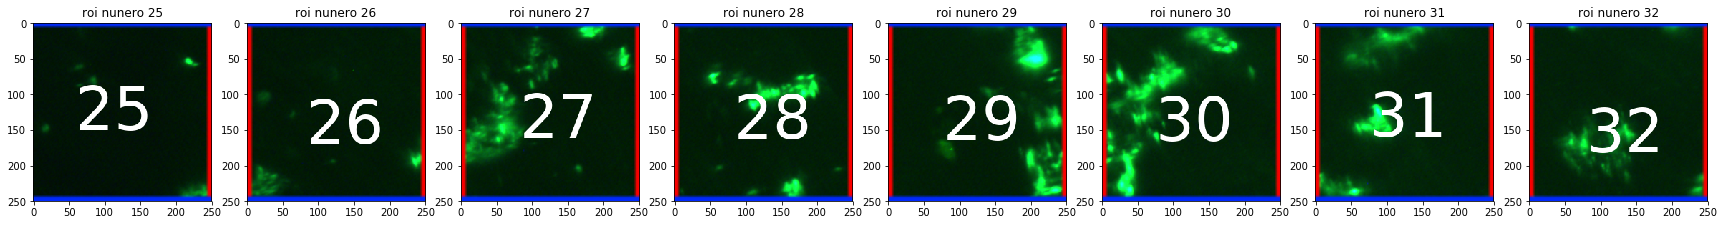

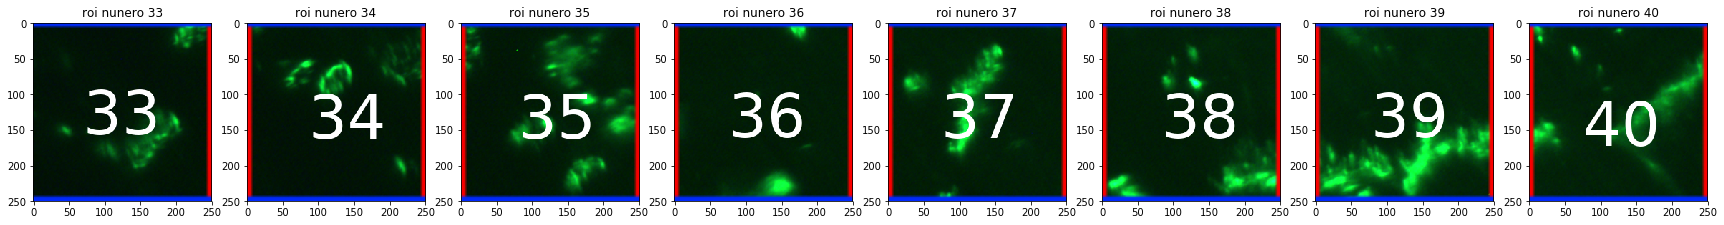

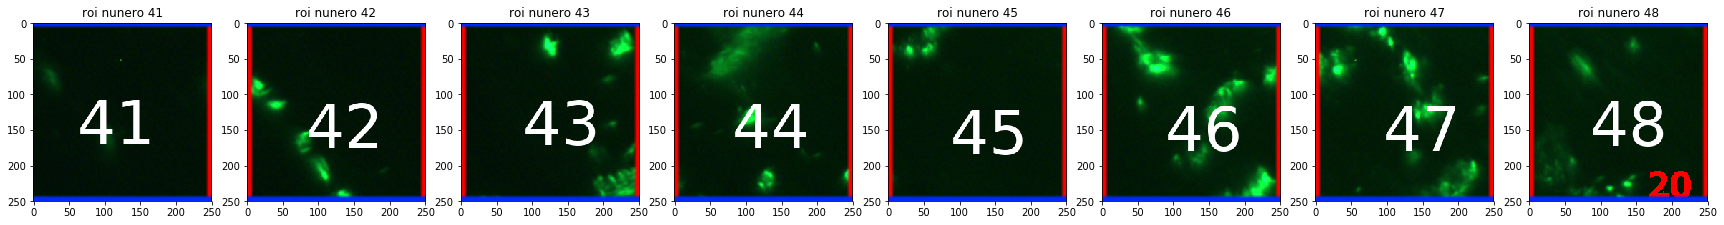

In [261]:

##################codigo######################################
tiles = []
(h,w) = image.shape[0:2]
out_size = 250
rows = 0
for y in range(0,h,out_size):
    rows = rows+1
    for x in range(0, w, out_size):
        y1 = y + out_size
        x1 = x + out_size
        n_img = image[y:y1,x:x1,:]
        if n_img.shape[:2] == (out_size,out_size):
                tiles.append(n_img)
tiles = np.stack(tiles) #convierto a tensor
#descomentar y ejecutar para salvar todas las imagenes en una carpeta temp_oriog
#for i in range(0,tiles.shape[0]):
#    j = i+1
#    cv2.imwrite(os.path.join('temp_orig' , '%s_croped.jpg'%j), tiles[i])

j=0
flag_plot = 1
tot_rows = rows +1
img_list = (np.ones(tiles.shape[0])*0).astype(int)
for i in range(0,tiles.shape[0]):
    img_list[i]=i+1


labels = np.array(img_list)
print("Recuerde que las Imagenes se Listan del Numero 1 al %s\n"%tiles.shape[0])
for i in range(0,labels.shape[0]):
    if(labels[i]<=tiles.shape[0]) and labels[i]>0:
        if flag_plot:
            plt.figure(figsize=(30,5))
            flag_plot = 0
        if(j<tot_rows):
            plt.subplot(1,tot_rows,j+1),plt.imshow(tiles[labels[i]-1][:,:,::-1]),plt.title("roi nunero %s"%(labels[i]))
            j = j+1
            if(j>=tot_rows):
                flag_plot = 1
                j=0
    else:   
        print("La Imagen numero %s que Usted Selecciono se Encuentra Fuera de Rango,Dispone de %s Imagenes\n"%
                (labels[i],tiles.shape[0]))
##################codigo######################################